In [178]:
# Importing important liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
import calendar
import seaborn as sns

In [14]:
# Loading the dataset
data = pd.read_csv('C:/Users/Snehal/Downloads/HospitalER.csv')
data.head()

,date,patient_id,patient_gender,patient_age,patient_sat_score,patient_first_inital,patient_last_name,patient_race,patient_admin_flag,patient_waittime,department_referral
0,2020-03-20 08:47:01,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN
1,2020-06-15 11:29:36,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN
2,2020-06-20 09:13:13,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice
3,2020-02-04 22:34:29,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice
4,2020-09-04 17:48:27,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics


In [13]:
# shape
data.shape

(9216, 11)

In [6]:
# Checking for null values
data.isnull().sum()

date                       0
patient_id                 0
patient_gender             0
patient_age                0
patient_sat_score       6699
patient_first_inital       0
patient_last_name          0
patient_race               0
patient_admin_flag         0
patient_waittime           0
department_referral     5400
dtype: int64

In [11]:
# Checking for duplicate values
data.duplicated().sum()

0

In [12]:
# Exploring data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  9216 non-null   object 
 1   patient_id            9216 non-null   object 
 2   patient_gender        9216 non-null   object 
 3   patient_age           9216 non-null   int64  
 4   patient_sat_score     2517 non-null   float64
 5   patient_first_inital  9216 non-null   object 
 6   patient_last_name     9216 non-null   object 
 7   patient_race          9216 non-null   object 
 8   patient_admin_flag    9216 non-null   bool   
 9   patient_waittime      9216 non-null   int64  
 10  department_referral   3816 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 729.1+ KB


In [236]:
# Extracting required columns

def process_data(data):
    df = pd.DataFrame()  
    df['Full_Name'] = (data['patient_first_inital'] + " " + data['patient_last_name'])
    df['Age'] = data['patient_age']
    df['Gender'] = data['patient_gender']
    df['Sat_Score'] = data['patient_sat_score']
    df['Race'] =  data['patient_race']
    df['Waiting_Time'] = data['patient_waittime']
    df['Referral'] = data['department_referral']
    df['date'] = data['date']
    
    # Dealing with date column
    data['date'] = pd.to_datetime(data['date']) # Converting date column to datetime
    df['Year'] = data['date'].dt.year # Extracting year
    df['Month'] = data['date'].dt.month # Extracting month
    df['Day'] = data['date'].dt.day # Extracting day
    df['Time'] = data['date'].dt.hour # Extracting time of visit
    
    return df

df = process_data(data)

In [237]:
# Creating age groups
def process_age_group(df):
    age_bins = [0, 20, 30, 40, 50, 80]  # Age bins
    age_labels = ['0-20', '21-30', '31-40', '41-50', '51-80']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
    return df

df = process_age_group(df)

In [238]:
# Processing Sat_Score & Referral columns 
def sat_score(df):
    df['Sat_Score'].fillna(0, inplace=True)
    df['Referral'].fillna("No", inplace=True)
    return df
df = sat_score(df)

In [239]:
def create_time_groups(df):
    df['Time'] = df['Time'].astype(int)
    time_bins = [-1, 6, 9, 12, 15, 18, 21, 24]
    time_labels = ['0-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-0']
    df['Visiting_Time'] = pd.cut(df['Time'], bins=time_bins, labels=time_labels, right=False)
    df.drop(columns=['Time'], inplace=True)

    return df

df = create_time_groups(df)

In [240]:
def create_waiting_time_groups(df):
    waiting_time_bins = [9, 20, 30, 40, 50, 60, 70]  
    waiting_time_labels = ['10-20 mins', '21-30 mins', '31-40 mins', '41-50 mins', '51-60 mins', '60+ mins']
    df['Waiting_Time_Group'] = pd.cut(df['Waiting_Time'], bins=waiting_time_bins, labels=waiting_time_labels, right=False)
    df.drop(columns=['Waiting_Time'], inplace=True)
    return df
df = create_waiting_time_groups(df)

In [241]:
def add_weekend_weekday_column(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    def weekend_weekday(date):
        if date.weekday() < 5:  
            return 'Weekday'
        else:  
            return 'Weekend'
    
    df['Weekend_Weekday'] = df[date_column].apply(weekend_weekday)
    
    return df
df = add_weekend_weekday_column(df, 'date')

In [242]:
df.head()

,Full_Name,Age,Gender,Sat_Score,Race,Referral,date,Year,Month,Day,Age_Group,Visiting_Time,Waiting_Time_Group,Weekend_Weekday
0,H Glasspool,69,M,10.0,White,No,2020-03-20 08:47:01,2020,3,20,51-80,6-8,31-40 mins,Weekday
1,X Methuen,4,M,0.0,Native American/Alaska Native,No,2020-06-15 11:29:36,2020,6,15,0-20,9-11,21-30 mins,Weekday
2,P Schubuser,56,F,9.0,African American,General Practice,2020-06-20 09:13:13,2020,6,20,51-80,9-11,51-60 mins,Weekend
3,U Titcombe,24,F,8.0,Native American/Alaska Native,General Practice,2020-02-04 22:34:29,2020,2,4,21-30,21-0,31-40 mins,Weekday
4,Y Gionettitti,5,M,0.0,African American,Orthopedics,2020-09-04 17:48:27,2020,9,4,0-20,15-17,10-20 mins,Weekday


#### Monthly analysis

Dropdown(description='Year:', index=1, options=(2019, 2020), value=2020)

Dropdown(description='Month:', options=('January', 'February', 'March', 'April', 'May', 'June', 'July', 'Augus…

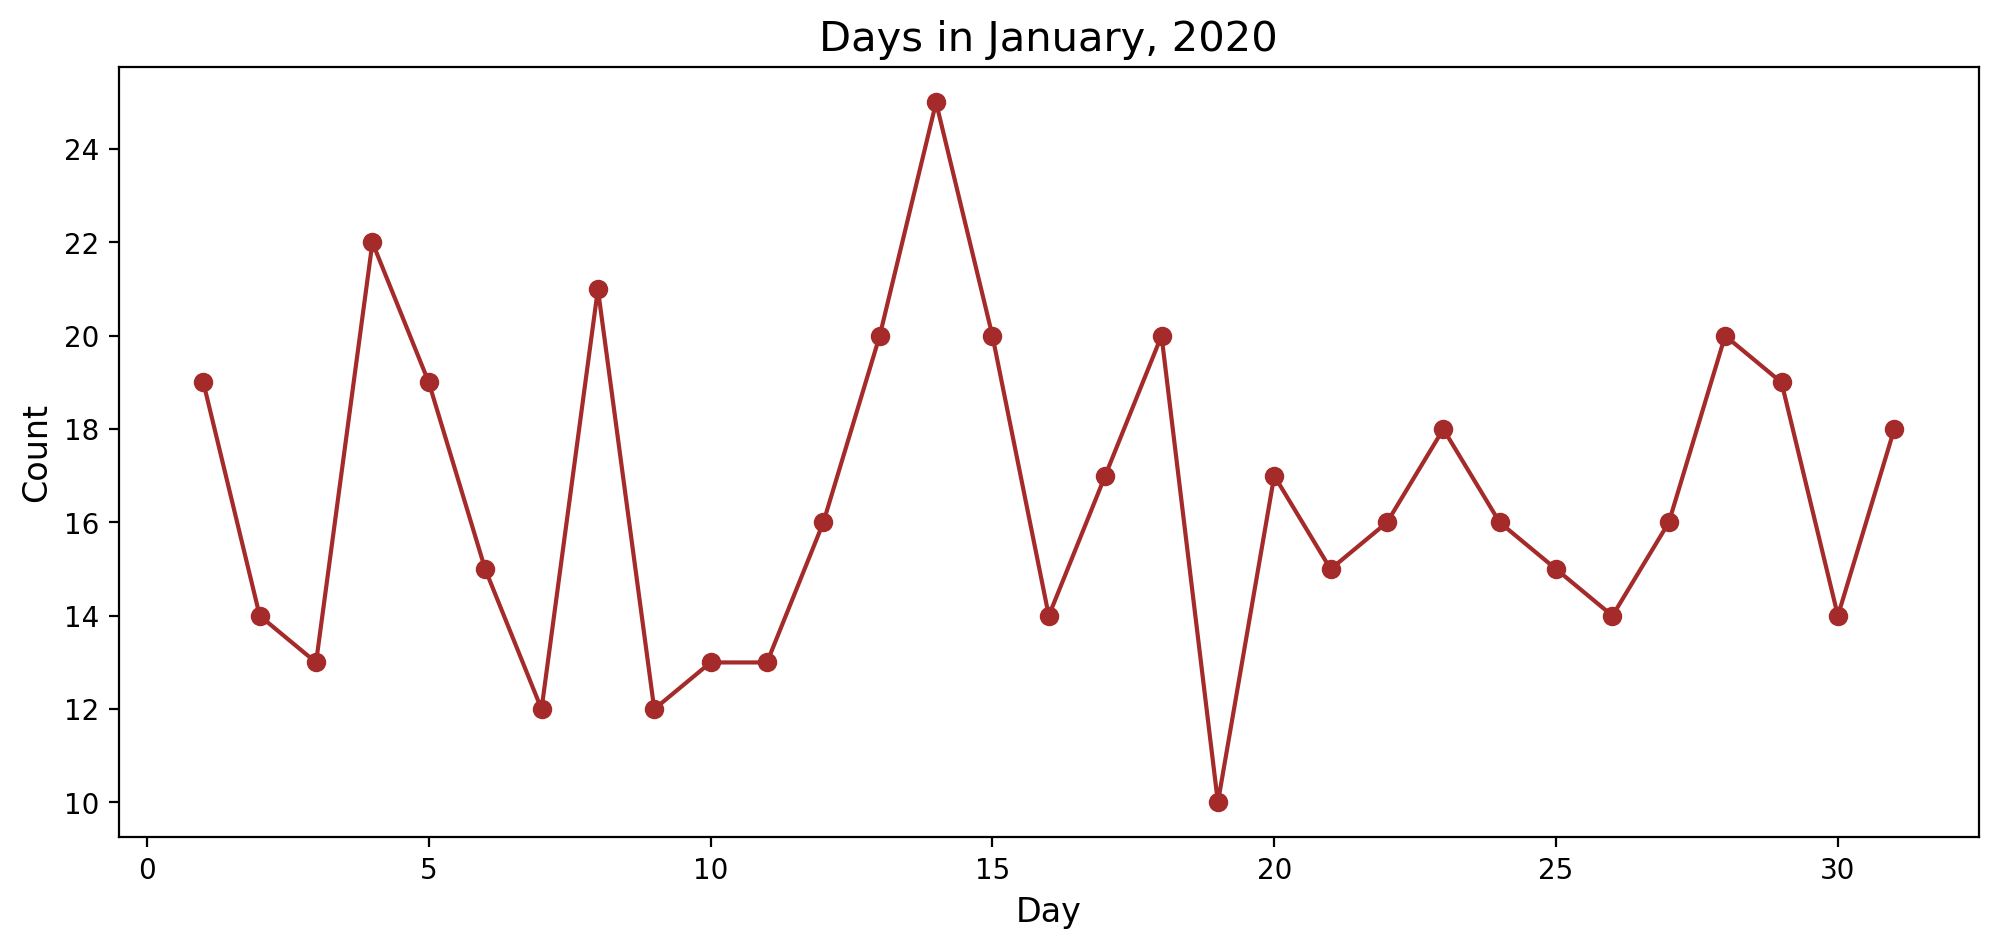

In [261]:
df['date'] = pd.to_datetime(df['date'])

def create_dropdowns():
    years = sorted(df['date'].dt.year.unique())
    months = [calendar.month_name[i] for i in range(1, 13)]
    year_dropdown = widgets.Dropdown(options=years, description='Year:')
    month_dropdown = widgets.Dropdown(options=months, description='Month:')
    
    return year_dropdown, month_dropdown

def update_line_plot(year, month):
    filtered_df = df[(df['date'].dt.year == year) & (df['date'].dt.month == list(calendar.month_name).index(month))]
    
    if filtered_df.empty:
        clear_output(wait=True)
        display(year_dropdown, month_dropdown)
        print(f"No data available for {month}, {year}")
    else:
        days_count = filtered_df['date'].dt.day.value_counts().sort_index()
        plt.figure(figsize=(12, 5),dpi=200)
        plt.plot(days_count.index, days_count.values, marker='o', linestyle='-', color='brown')
        plt.title(f'Days in {month}, {year}',fontsize=15)
        plt.xlabel('Day',fontsize=12)
        plt.ylabel('Count',fontsize=12)
        plt.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(year_dropdown, month_dropdown)
        update_line_plot(year_dropdown.value, month_dropdown.value)

year_dropdown, month_dropdown = create_dropdowns()
display(year_dropdown, month_dropdown)
update_line_plot(year_dropdown.value, month_dropdown.value)
year_dropdown.observe(on_change)
month_dropdown.observe(on_change)

#### Overview

In [253]:
# Information 
month_names = {i: calendar.month_name[i] for i in range(1, 13)}
year_dropdown = widgets.Dropdown(options=df['Year'].unique(), description='Year:')
month_dropdown = widgets.Dropdown(options=month_names.values(), description='Month:')
day_dropdown = widgets.Dropdown(description='Day:')
title = widgets.HTML(value="<h3>Select Year, Month, and Day to get Patient Information</h3>")
filtered_df = None

def update_day_options(year, month):
    num_days = calendar.monthrange(year, list(month_names.keys())[list(month_names.values()).index(month)])[1]
    day_dropdown.options = [i for i in range(1, num_days + 1)]

def update_dataframe(year, month, day):
    global filtered_df
    month_number = [key for key, value in month_names.items() if value == month][0]
    filtered_df = df[(df['Year'] == year) & (df['Month'] == month_number) & (df['Day'] == day)]
    if filtered_df.empty:
        clear_output()  
        display(year_dropdown, month_dropdown, day_dropdown)  
        print(f"No data available for {year}, {month}, {day}")
    else:
        clear_output()  
        display(year_dropdown, month_dropdown, day_dropdown)  
        display(filtered_df[['Full_Name', 'Gender', 'Referral', 'Day', 'Age_Group', 'Visiting_Time']])

def on_year_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_day_options(year_dropdown.value, month_dropdown.value)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_dataframe(year_dropdown.value, month_dropdown.value, day_dropdown.value)

update_day_options(year_dropdown.value, month_dropdown.value)
update_dataframe(year_dropdown.value, month_dropdown.value, day_dropdown.value)
year_dropdown.observe(on_year_change)
month_dropdown.observe(on_change)
day_dropdown.observe(on_change)

Dropdown(description='Year:', options=(2020, 2019), value=2020)

Dropdown(description='Month:', options=('January', 'February', 'March', 'April', 'May', 'June', 'July', 'Augus…

Dropdown(description='Day:', index=13, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…

,Full_Name,Gender,Referral,Day,Age_Group,Visiting_Time
61,Y Silveston,F,No,14,0-20,6-8
155,Z Row,F,No,14,41-50,15-17
1521,P Abrahart,F,No,14,51-80,6-8
2487,L Capitano,F,Orthopedics,14,51-80,21-0
2699,Q Tschirasche,M,Cardiology,14,21-30,6-8
2748,C Auger,M,No,14,51-80,15-17
2909,U Ainley,F,Physiotherapy,14,31-40,0-5
3124,A Lyne,M,No,14,31-40,0-5
3521,T Menis,F,No,14,51-80,0-5
4066,C Pascho,M,No,14,51-80,0-5


#### Waiting_Time_Group

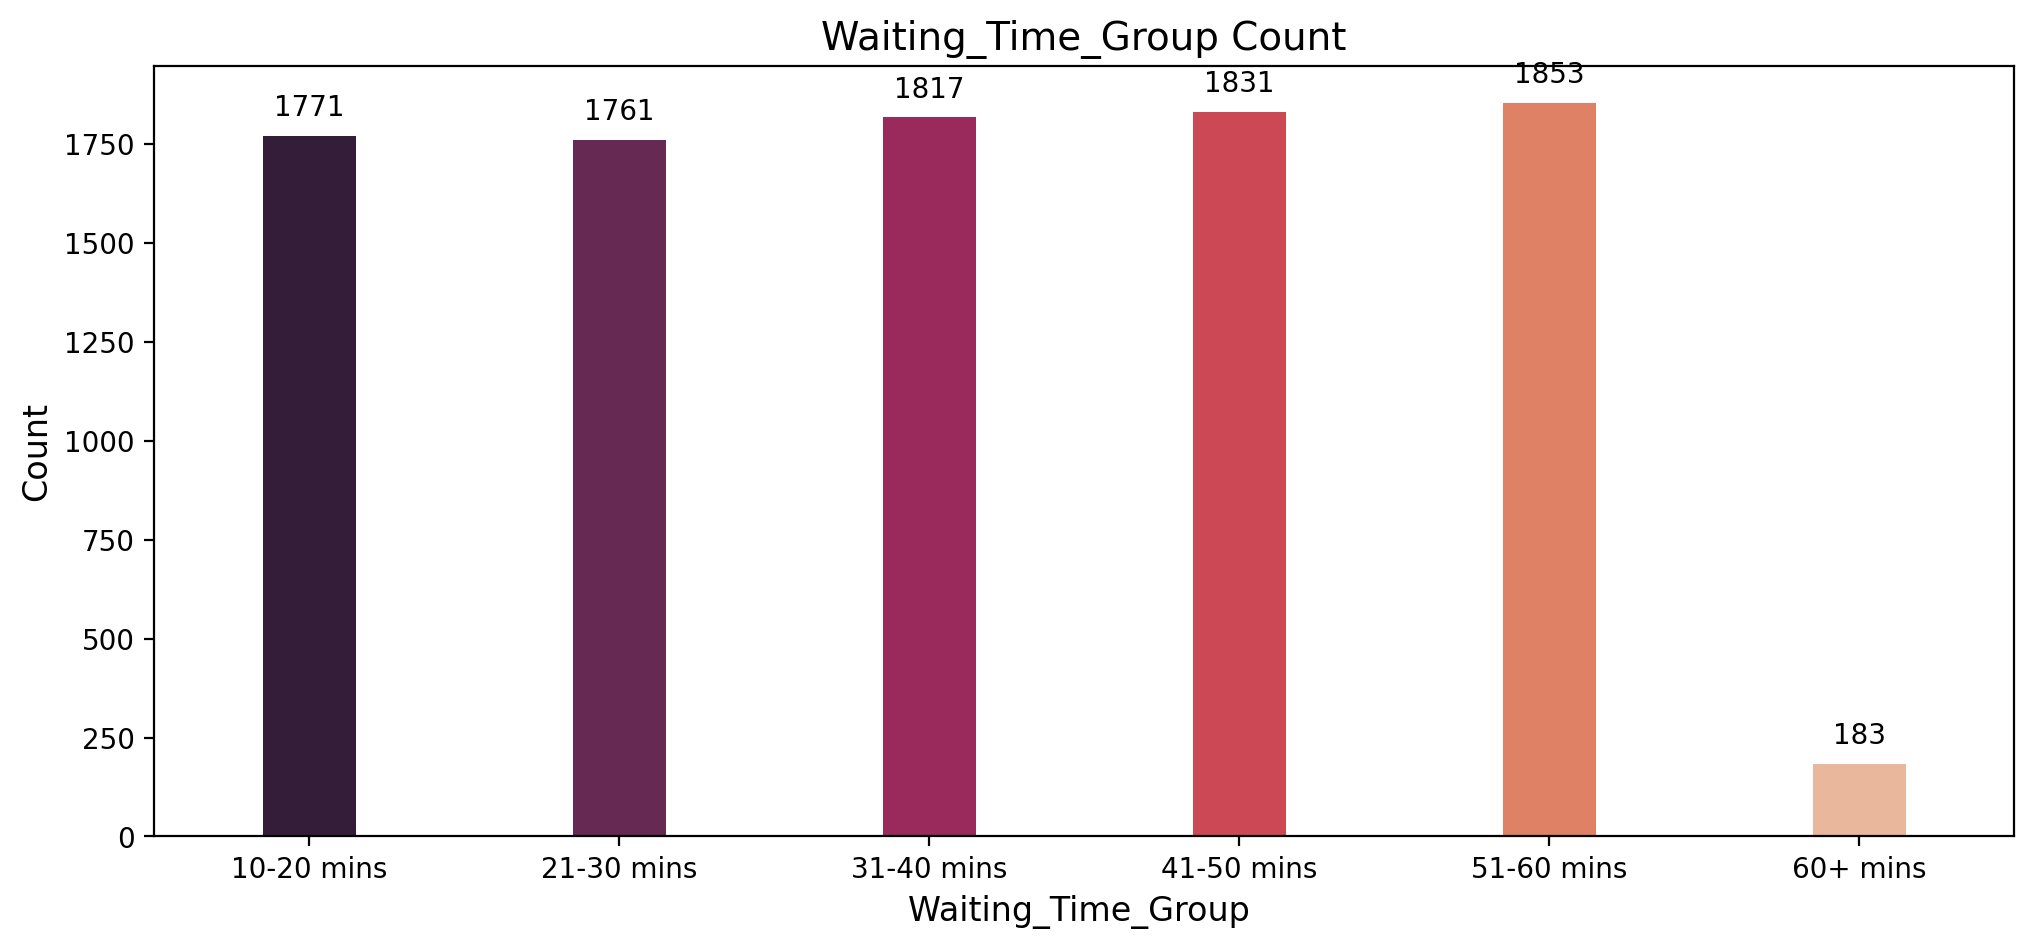

In [254]:
filtered_df = df[df['Waiting_Time_Group'] != "No"]
plt.figure(figsize=(12, 5),dpi=200)
ax = sns.countplot(x='Waiting_Time_Group', data=filtered_df, palette='rocket',width=0.3)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Waiting_Time_Group Count', fontsize=14)
plt.xlabel('Waiting_Time_Group ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Visiting_Time

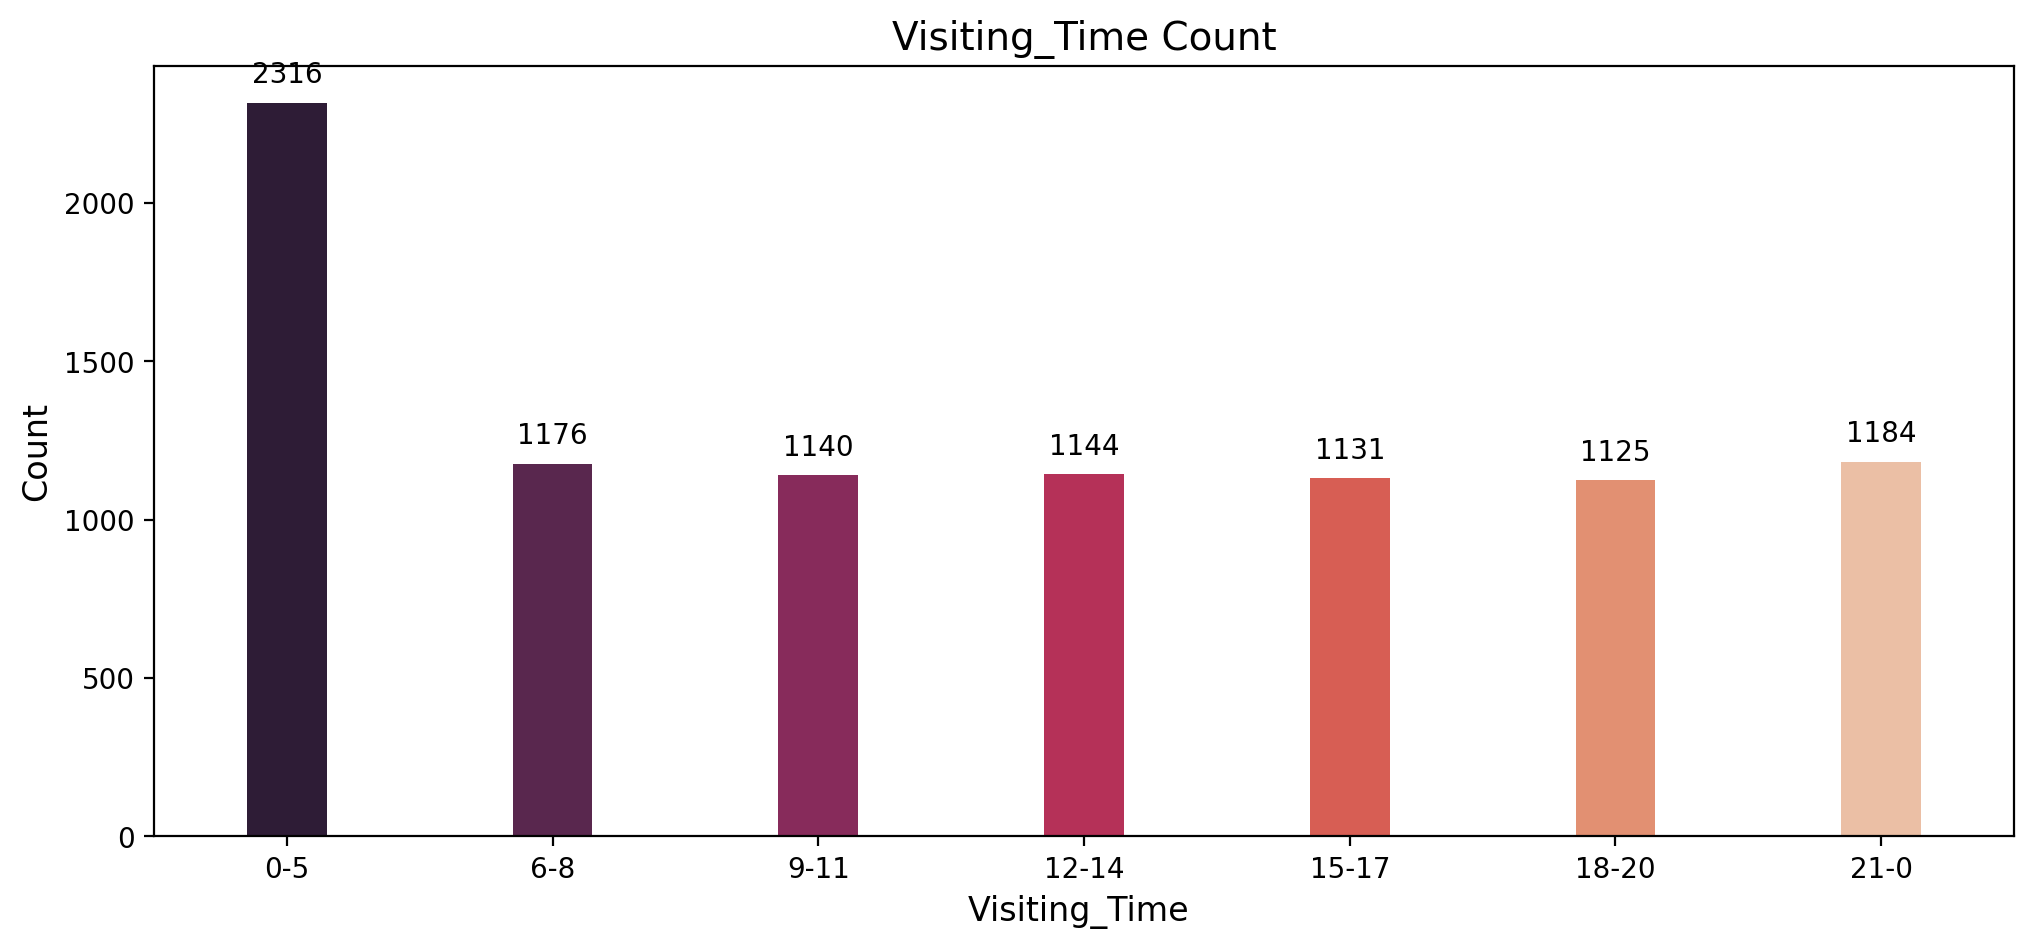

In [255]:
filtered_df = df[df['Visiting_Time'] != "No"]
plt.figure(figsize=(12, 5),dpi=200)
ax = sns.countplot(x='Visiting_Time', data=filtered_df, palette='rocket',width=0.3)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Visiting_Time Count', fontsize=14)
plt.xlabel('Visiting_Time ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Weekend_weekday

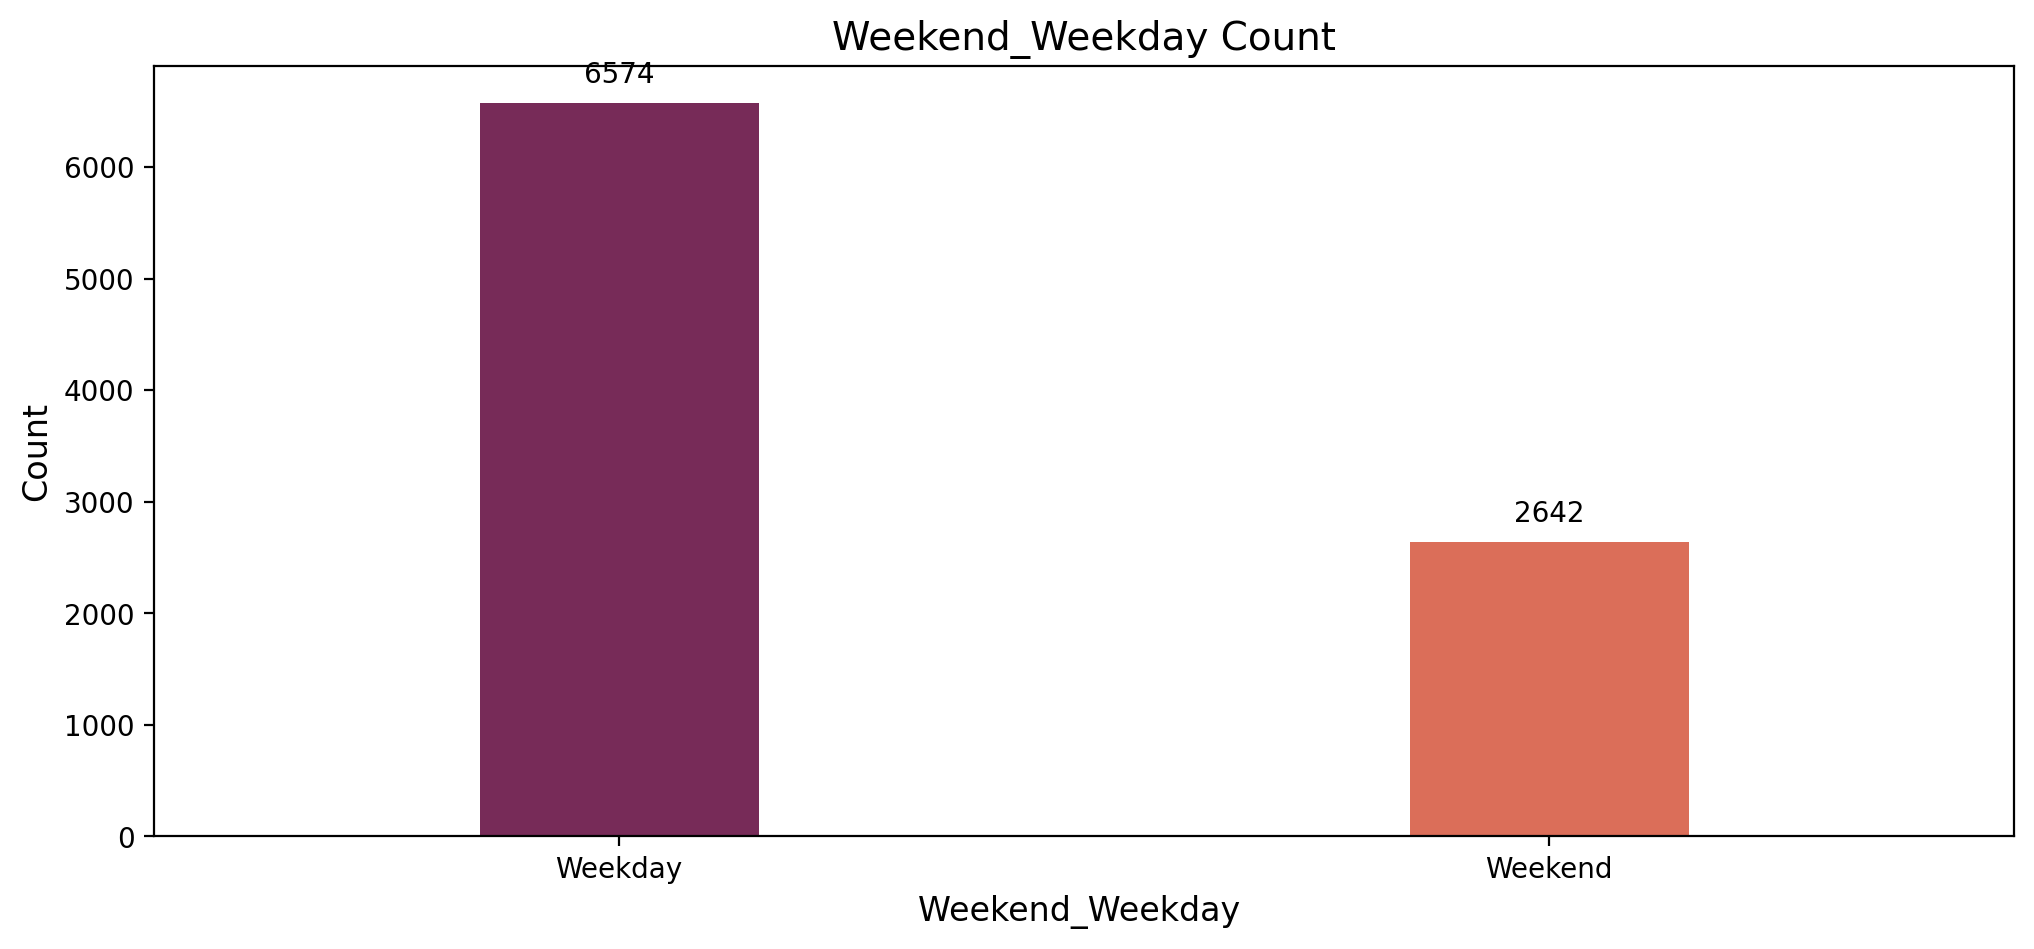

In [256]:
filtered_df = df[df['Weekend_Weekday'] != "No"]
plt.figure(figsize=(12, 5),dpi=200)
ax = sns.countplot(x='Weekend_Weekday', data=filtered_df, palette='rocket',width=0.3)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Weekend_Weekday Count', fontsize=14)
plt.xlabel('Weekend_Weekday ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

####  Gender 

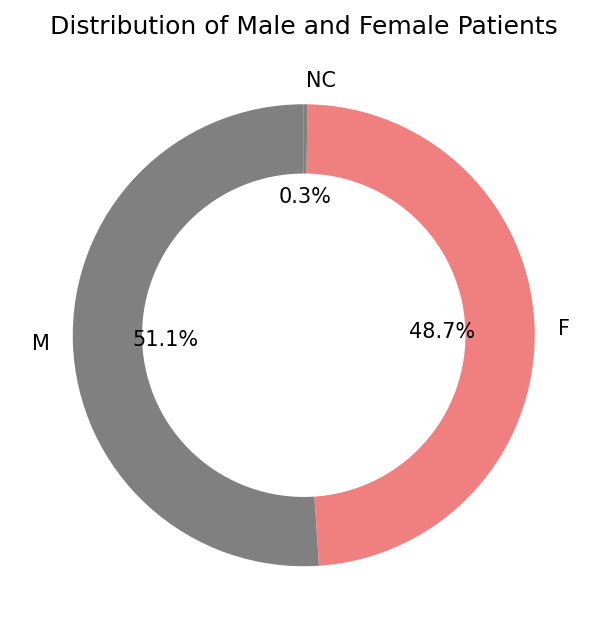

In [257]:
# Creating Donut chart to show gender distribution
gender_counts = df['Gender'].value_counts()
total_count = gender_counts.sum()
gender_percentages = gender_counts / total_count * 100
plt.figure(figsize=(5, 5),dpi=150)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['grey', 'lightcoral'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Distribution of Male and Female Patients',fontsize=12)
plt.show()

####  Sat Score

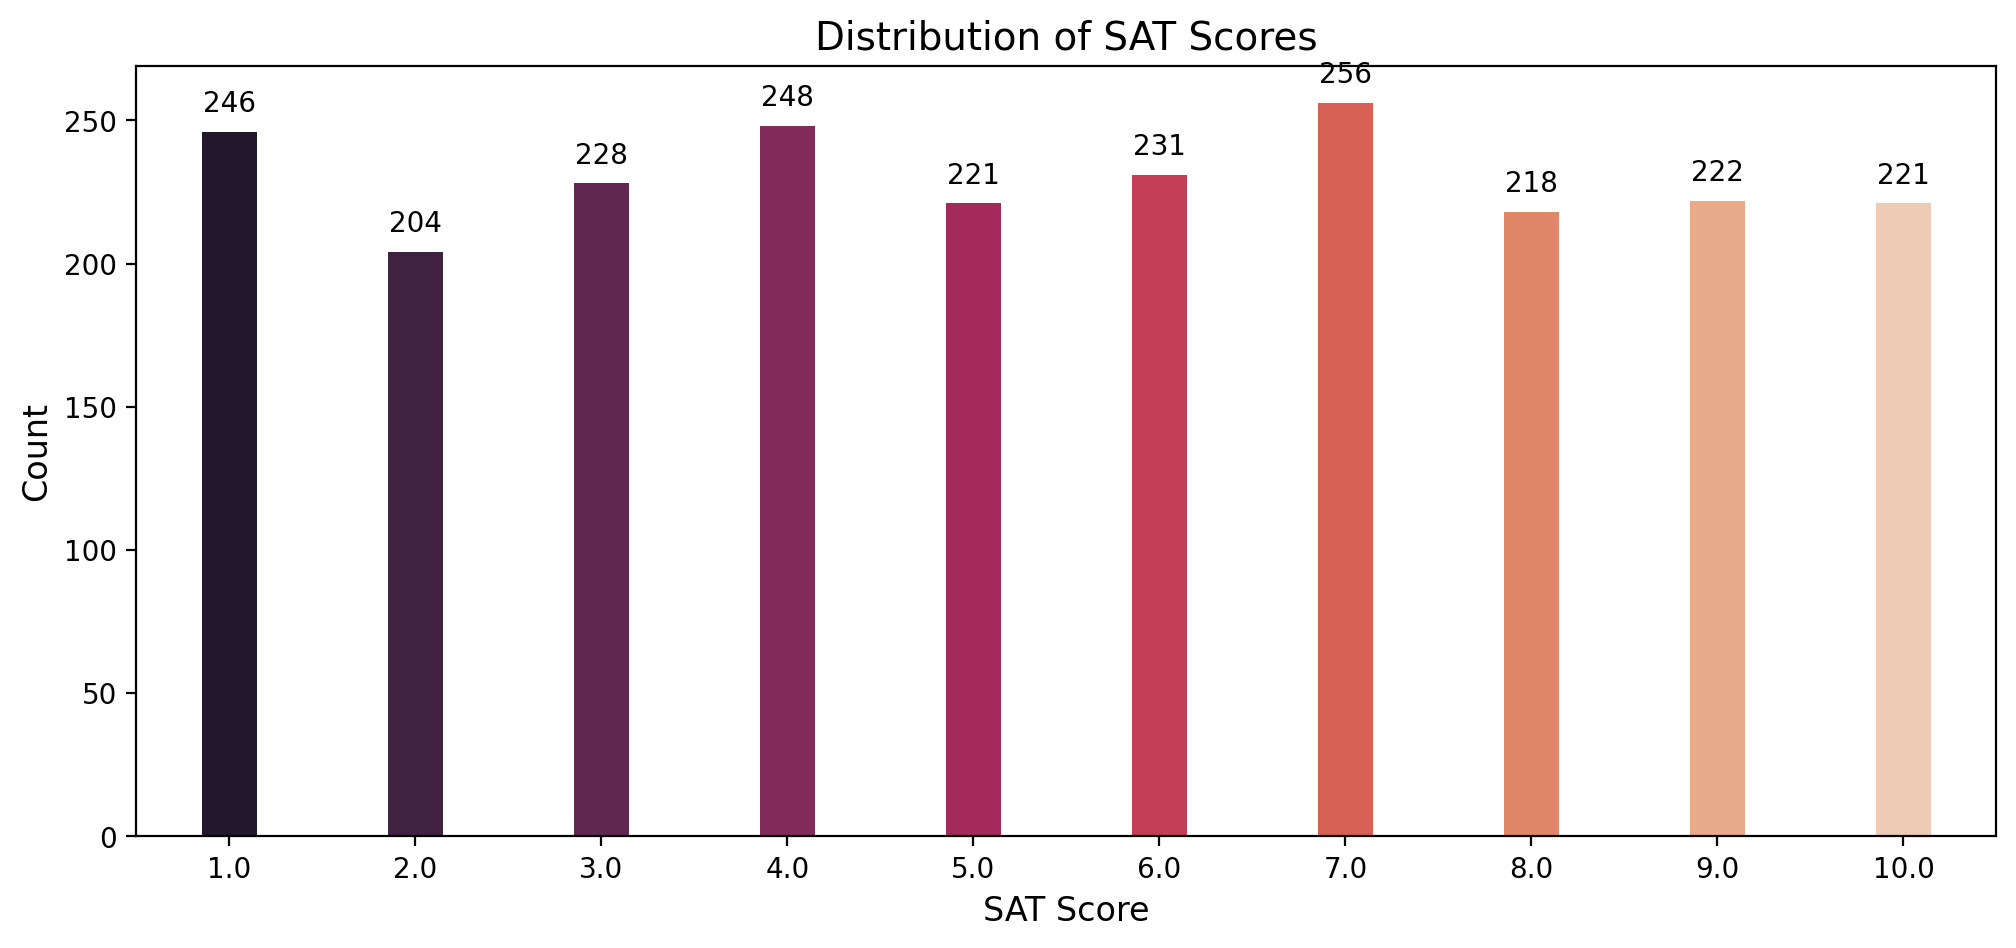

In [258]:
filtered_df = df[df['Sat_Score'] != 0.0]
plt.figure(figsize=(12, 5),dpi=200)
ax = sns.countplot(x='Sat_Score', data=filtered_df, palette='rocket',width=0.3)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of SAT Scores', fontsize=14)
plt.xlabel('SAT Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

####  Referral

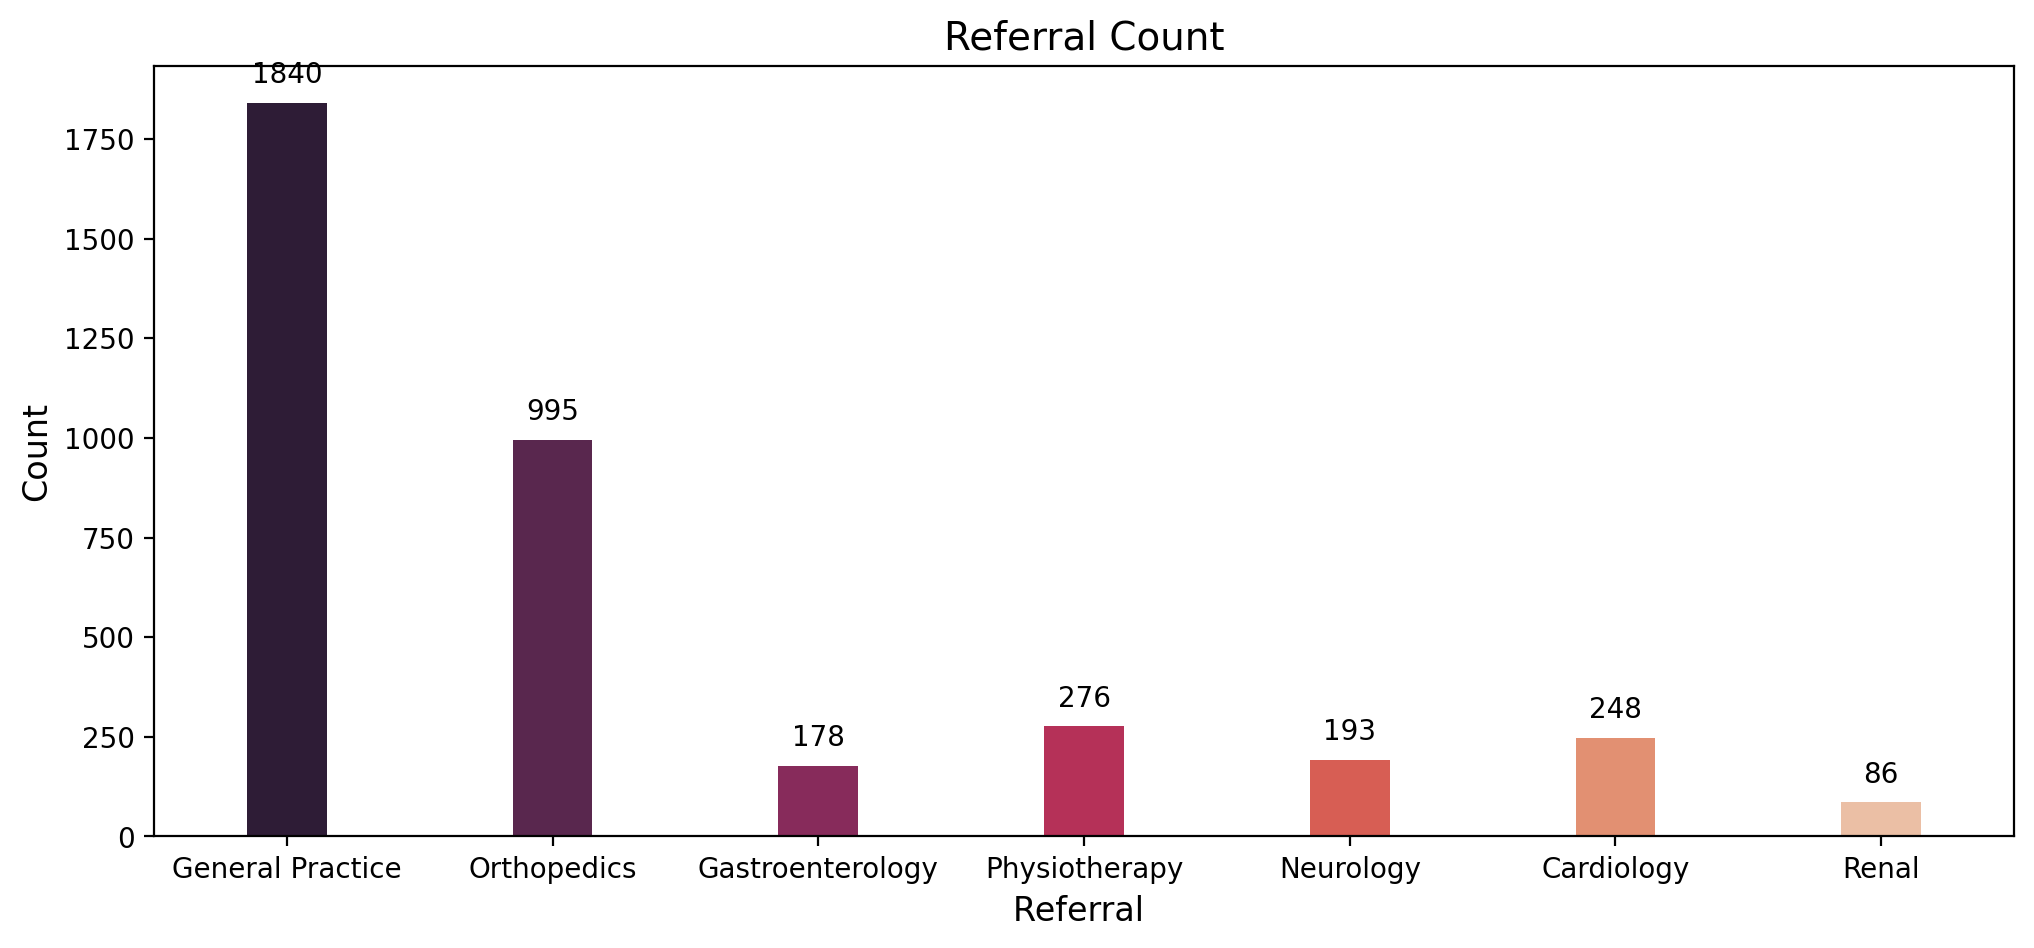

In [259]:
filtered_df = df[df['Referral'] != "No"]
plt.figure(figsize=(12, 5),dpi=200)
ax = sns.countplot(x='Referral', data=filtered_df, palette='rocket',width=0.3)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Referral Count', fontsize=14)
plt.xlabel('Referral ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

####  Age_Group

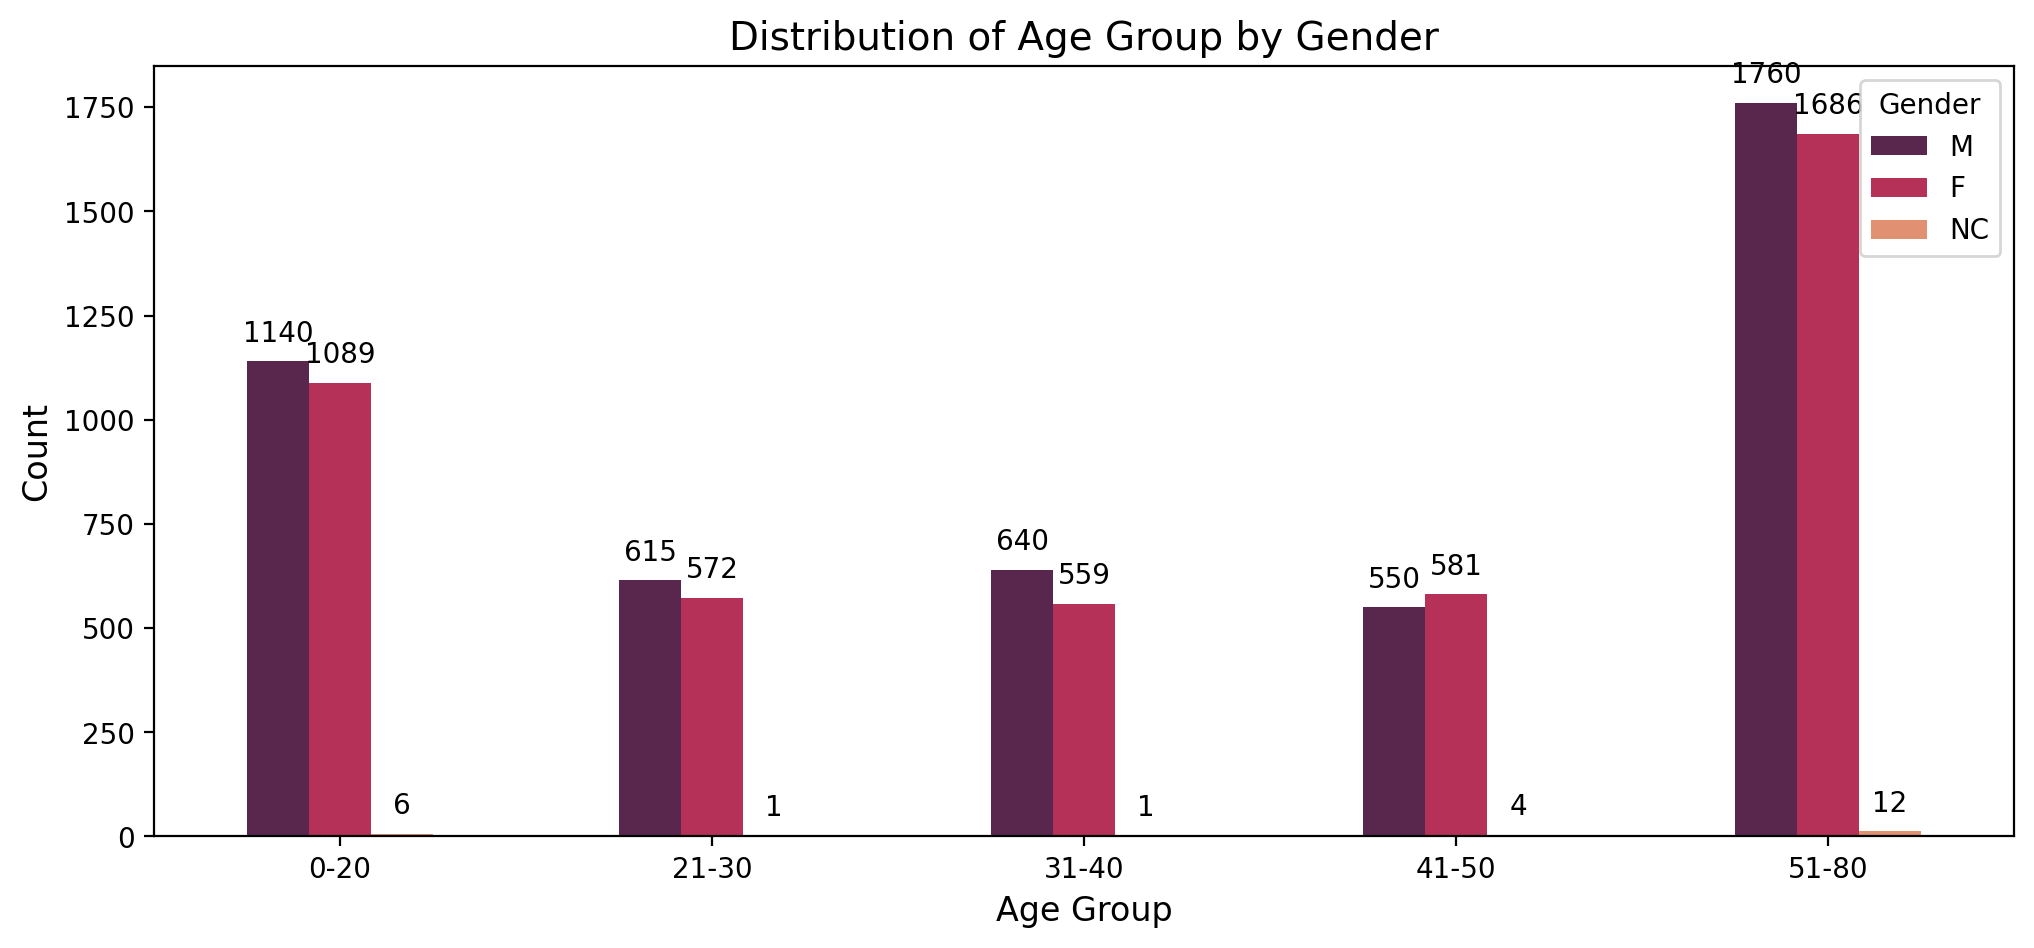

In [260]:
filtered_df = df[df['Age_Group'] != 'NC'] 
plt.figure(figsize=(12, 5),dpi=200)
ax = sns.countplot(x='Age_Group', hue='Gender', data=filtered_df, palette='rocket', width=0.5)
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Age Group by Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.show()